# Asymmetrical bang-bang solution and pursuit


Let $t$ be the time variable, $T$ the time (in $s$) when the target is pointed, $x(t)$ and $\dot{x}(t)$ respectively the position and the velocity at time $t$, $x_T$ the position to reach, $\rho \in \left [0 ,1\right]$.  
$x(t=0) = 0$ and $\dot{x}(t=0) = 0$  
  
$\newcommand{\intervalle}[2]{\left[#1\mathclose{}\mathpunct{};#2\right]}
\newcommand{\intervallefo}[2]{\left[#1\mathclose{}\mathpunct{};#2\right[}
\newcommand{\intervalleof}[2]{\left]#1\mathclose{}\mathpunct{};#2\right]}
\newcommand{\intervalleoo}[2]{\left]#1\mathclose{}\mathpunct{};#2\right[}$  
$\forall t \in \intervalle{0}{\rho\cdot T} : u(t) = U_+$  
$\forall t \in \intervalleof{\rho\cdot T}{T} : u(t) = U_-$  
$\forall t \in \intervalleoo{T}{+\infty} : u(t) = U_{\infty}$  
  
Formally, 
$$
u(t) = \mathbb 1_{\intervalle{0}{\rho\cdot T}} \cdot U_+ + \mathbb 1_{\intervalleof{\rho\cdot T}{T}} \cdot U_- + \mathbb 1_{\intervalleoo{T}{+\infty}} \cdot U_\infty
$$

where $\mathbb 1_{\mathcal{I}}$ is the [indicator function](https://en.wiktionary.org/wiki/indicator_function#English) of the interval $\mathcal{I}$
  
We will solve the following differential equation, which represents a linear model of the eye, on the previous intervals:  
  
$$
\dfrac{d\dot{x}(t)}{dt} = -\frac{\beta}{m}\cdot\dot{x}(t)+\frac{1}{m}\cdot u(t)
$$

where $\beta$ and $m$ are constants of the eye, with $\left[\dfrac{\beta}{m}\right] = s^{-1}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
b = 100
m = 1
xT = 10
dt = 0.0001
t_T = .05
t_R = .05
k = 0.05
T = int(t_T/dt)
R = int(t_R/dt)
time = np.linspace(0, t_T+t_R, R+T+1)
time_ms = time*1000
v0 = 10

On $\intervalle{0}{\rho\cdot T}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{\beta}{m}\cdot\dot{x}(t)+\dfrac{U_+}{m}$  
  
We find:  $\dot{x}(t) = \frac{U_+}{\beta}\left (1-e^{- \frac{\beta}{m}t} \right )$ and so : $x(t) = \frac{U_+}{\beta}\left [t-\frac{m}{\beta}\left(1-e^{- \frac{\beta}{m}t} \right )\right]$

On $\intervalleof{\rho\cdot T}{T}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{\beta}{m}\cdot\dot{x}(t)+\dfrac{U_-}{m}$  
  
We find:  $\dot{x}(t) = \frac{U_-}{\beta}\left (1-e^{\frac{\beta}{m}\left (T-t\right)} \right )$ and so : $x(t) = x_T - \frac{U_-}{\beta}\left [T-t+\frac{m}{\beta}\left(1-e^{\frac{\beta}{m}\left (T-t\right)} \right )\right]$
 

On $\intervalleoo{T}{+\infty}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{\beta}{m}\cdot\dot{x}(t)+\dfrac{U_{\infty}}{m}$  
  
We find:  $U_{\infty} = 0$ since $\forall t \in \intervalleoo{T}{+\infty}, \dot{x}(t) = 0$ (and $\ddot{x}(t) = 0$) and so : $x(t) = x_T$
 

Then, we use the continuity of the velocity at time $\rho\cdot T$ to find relations between $U_+$, $U_-$ and $\rho$.  
    
$U_+ = U_- \times \dfrac{1-e^{\frac{\beta}{m}\left(1-\rho \right)T}}{1-e^{-\frac{\beta}{m}\rho T}}$  
  
With the continuity of the position at time $\rho\cdot T$, we find relations between $U_-$ and $\rho$, and between $U_+$ and $\rho$.  

$U_- = \beta \times \dfrac{1-e^{-\frac{\beta}{m}\rho T}}{T-\left (1-\rho\right)T e^{-\frac{\beta}{m}\rho T}-\rho T e^{\frac{\beta}{m}\left(1-\rho \right)T}} \cdot  x_T$

$U_+ = \beta \times \dfrac{1-e^{\frac{\beta}{m}\left(1-\rho \right)T}}{T-\left (1-\rho\right)T e^{-\frac{\beta}{m}\rho T}-\rho T e^{\frac{\beta}{m}\left(1-\rho \right)T}} \cdot  x_T$

In [3]:
def fact(n): 
    """The factorial function
    Returns n!, that is n x (n-1) x (n-2) x ... x 1
    Recursive implementation
    """
    if n == 0:
        return 1
    else:
        return(n*fact(n-1))

In [4]:
# definition of A and B
beta = b
A = np.zeros((2,2))
B = np.zeros(2)
for i in np.arange(2):
    for j in np.arange(i,2):
        A[i,j] = dt**(j-i)/fact(j-i)
A[1, 1] = 1-dt*beta/m
B[1] = dt/m

In [5]:
def power(A, n): 
    """
    renvoie A puissance n où A est une matrice carrée
        
    """
    if n == 0:
        return(np.eye(int(np.sqrt(np.size(A)))))
    elif n == 1:
        return A
    else:
        if n % 2 == 0:
            A_half = power(A, n//2)
            return(A_half.dot(A_half))
        else:
            A_half = power(A, (n-1)//2)
            return(A.dot(A_half.dot(A_half)))

def A_pow(A):
    A_pow_array = np.zeros((T+R+1,2,2))

    for i in np.arange(T+R+1):
        A_pow_array[i] = power(A,i)
    return A_pow_array

A_pow_array = A_pow(A)

def pow_fast(n):
    return A_pow_array[n]

ci0_array = np.zeros(T+R+1)

for i in np.arange(T+R+1):
    ci0_array[i] = (pow_fast(i).dot(B))[0]

ci1_array = np.zeros(T+R+1)

for i in np.arange(T+R+1):
    ci1_array[i] = (pow_fast(i).dot(B))[1]
    
#ci2_array = np.zeros(T+R+1)

#for i in np.arange(T+R+1):
#    ci2_array[i] = (pow_fast(i).dot(B))[2]
    
#ci3_array = np.zeros(T+R+1)

#for i in np.arange(T+R+1):
#    ci3_array[i] = (pow_fast(i).dot(B))[3]

ci = np.array([ci0_array, ci1_array])

In [6]:
def expectation(u, t):
    """Computation of the expectation of the state vector at time t, given u
    """
    if t == 0:
        return np.array([0,0])
    else:
        return (ci[:,0:t]*np.flipud(u[0:t])).sum(axis = 1)

In [7]:
def variance(u, t):
    """Computation of the variance of the state vector at time t, given u
    """
    return (m**2)*k*(np.flipud(ci0_array[0:t]**2)*u[0:t]**2).sum()

In [10]:
n = 100 # number of rho's values

In [11]:
rho = np.linspace(0.5,0.999,n) # rho's tested values

In [43]:
Umoins = b*((xT+v0*(T*dt+m/b))*(1-np.exp(-rho*b*T*dt/m))-v0*rho*T*dt*np.exp((1-rho)*b*T*dt/m))/(T*dt-(1-rho)*T*dt*np.exp(-rho*b*T*dt/m)-rho*T*dt*np.exp((1-rho)*b*T*dt/m))

In [44]:
Uplus = (1-np.exp((1-rho)*b*T*dt/m))/(1-np.exp(-rho*b*T*dt/m))*Umoins+b*v0*np.exp((1-rho)*b*T*dt/m)/(1-np.exp(-rho*b*T*dt/m))

In [45]:
Uplus

array([ 45004.79287106,  44603.08523716,  44209.73478392,  43824.49986042,
        43447.14818978,  43077.45641882,  42715.20969337,  42360.20125756,
        42012.23207551,  41671.11047406,  41336.65180504,  41008.67812594,
        40687.01789785,  40371.50569948,  40061.98195636,  39758.29268423,
        39460.28924586,  39167.82812032,  38880.77068412,  38598.98300345,
        38322.33563679,  38050.70344752,  37783.96542561,  37522.00451823,
        37264.70746848,  37011.96466197,  36763.66998072,  36519.72066399,
        36280.01717572,  36044.46307809,  35812.96491101,  35585.43207713,
        35361.7767321 ,  35141.91367982,  34925.76027241,  34713.2363146 ,
        34504.26397242,  34298.76768587,  34096.67408543,  33897.91191215,
        33702.41194124,  33510.10690886,  33320.93144209,  33134.82199177,
        32951.71676826,  32771.55567974,  32594.28027317,  32419.8336776 ,
        32248.16054985,  32079.2070223 ,  31912.92065288,  31749.25037702,
        31588.14646143,  

In [70]:
u = np.zeros((n-1, T+R+1))

for i in np.arange(n-1):
    rhoT = np.round(T*rho[i])
    u[i,:] = np.concatenate((Uplus[i]*np.ones(rhoT),Umoins[i]*np.ones(T-rhoT),b*v0*np.ones(R+1)))

In [71]:
position = np.zeros((n-1, T+R+1))
velocity = np.zeros((n-1, T+R+1))

for i in np.arange(n-1):
    for j in np.arange(T+R+1):
        mean = expectation(u[i,:], j)
        position[i,j] = mean[0]
        velocity[i,j] = mean[1]

In [72]:
variancev = np.zeros((n-1, T+R+1))

for i in np.arange(n-1):
    for j in np.arange(T+R+1):
        variancev[i,j] = variance(u[i,:], j)

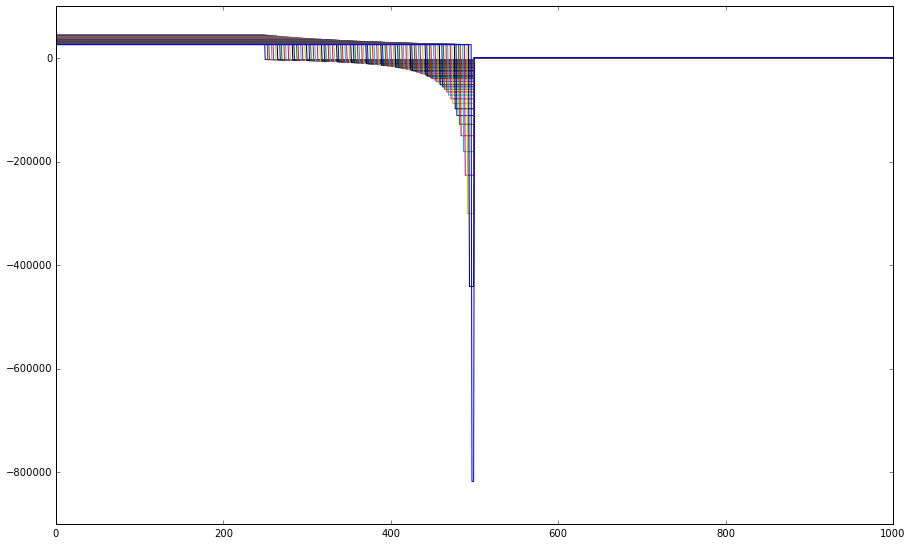

In [73]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
for i in np.arange(n-1):
    ax.plot(u[i,:])

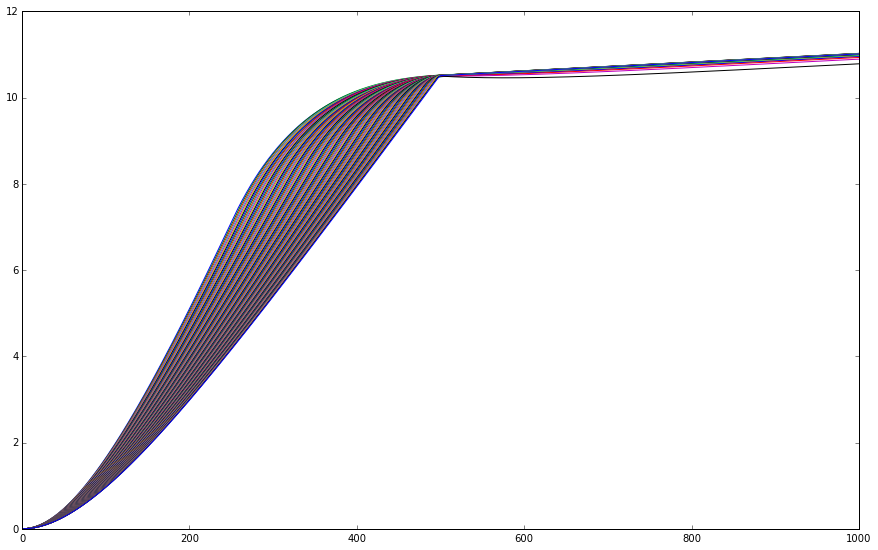

In [74]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
for i in np.arange(n-1):
    ax.plot(position[i,:])

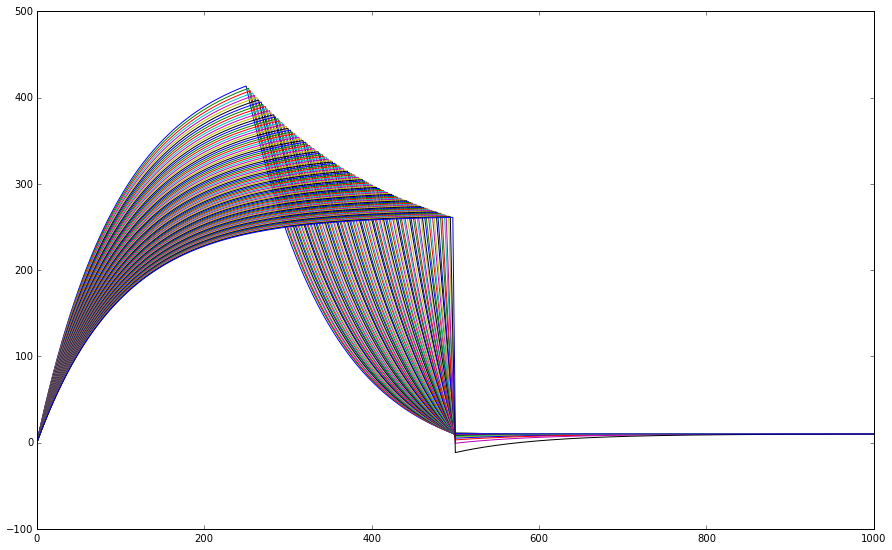

In [75]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
for i in np.arange(n-1):
    ax.plot(velocity[i,:])

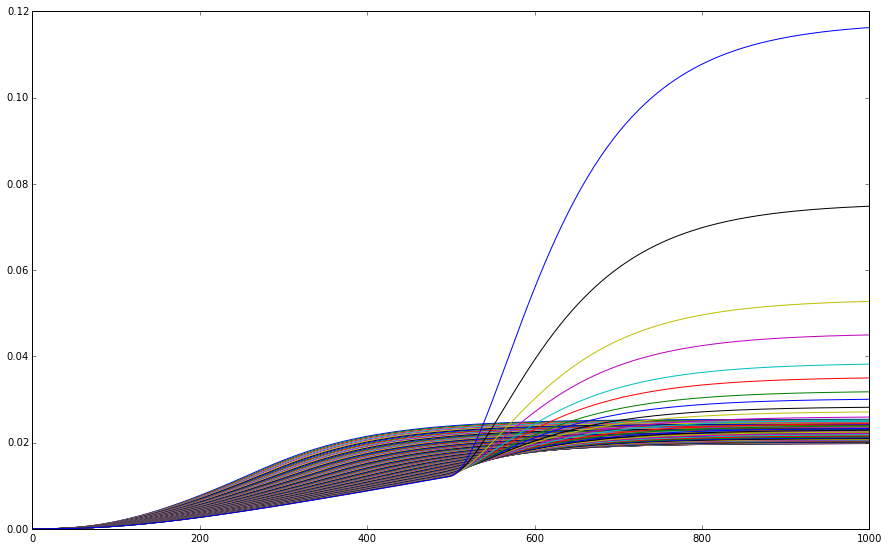

In [76]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
for i in np.arange(n-1):
    ax.plot(variancev[i,:])

In [77]:
somme = np.zeros(n-1)
for i in np.arange(n-1):
    for j in T+np.arange(R+1):
        somme[i] += variancev[i,j]

In [78]:
ind_best = np.argmin(somme)

In [79]:
rho[ind_best]

0.82258585858585853

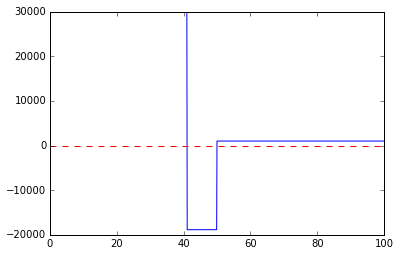

In [80]:
plt.plot(time_ms, u[ind_best,:])

plt.plot([0,(t_T+t_R)*1000],[0,0],'r--')

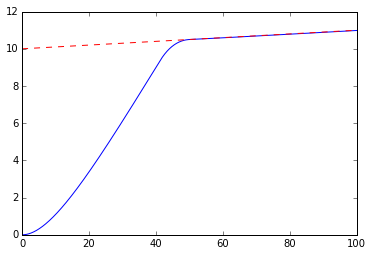

In [82]:
plt.plot(time_ms,position[ind_best,:])

plt.plot([0,(t_T+t_R)*1000],[xT,xT+v0*(T+R+1)*dt],'r--')

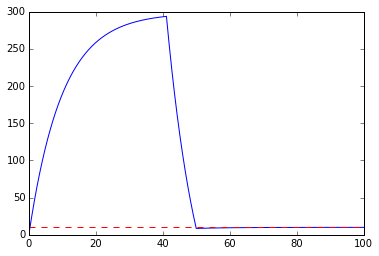

In [83]:
plt.plot(time_ms, velocity[ind_best,:])

plt.plot([0,(t_T+t_R)*1000],[v0,v0],'r--')